In [1]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
border_file = '../../data/land/border_lines_GB.gpkg' 
alc_file = '../../data/land/NE_AgriculturalLandClassificationProvisionalEngland_FGDB/data.gdb/'
crop_file = '../../data/land/CEH/UK_CEH_Crops_2016.gdb'

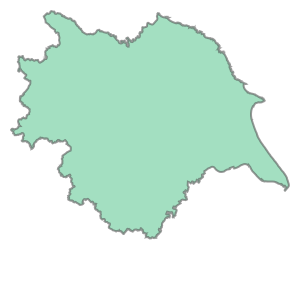

In [3]:
yorkshire_index = 66

counties = gpd.read_file(border_file, layer='boundary_line_historic_counties')
county_boundary = counties.iloc[yorkshire_index]['geometry']
county_boundary

In [4]:
crops = gpd.read_file(crop_file, mask = county_boundary)
alc = gpd.read_file(alc_file, mask = county_boundary)

In [5]:
city_dict = {'Leeds' : [53.799722, -1.549167],
            'Sheffield' : [53.38297, -1.4659],
            'Bradford' : [53.8, -1.75],
            'Kingston upon Hull' : [53.744444, -0.3325],
            'York' : [53.958333, -1.080278],
            'Huddersfield' : [53.644811, -1.782137],
            'Middlesbrough' : [54.576397, -1.235758],}

In [6]:
alc = alc.to_crs(epsg=4326)
crops = crops.to_crs(epsg=4326)
counties = counties.to_crs(epsg=4326)

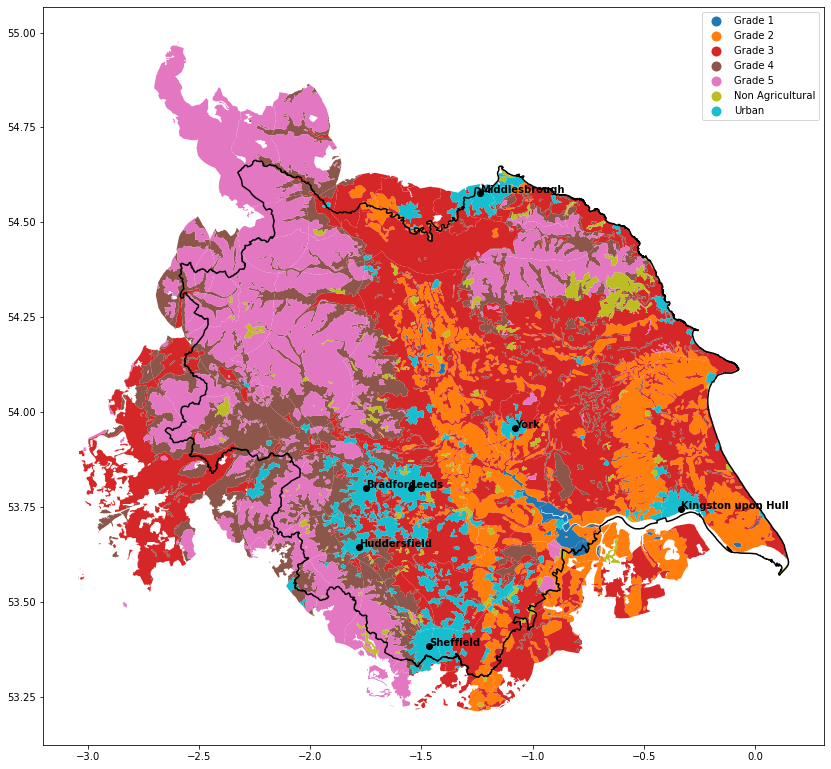

In [7]:
# Plot county boundary and crop positions on the same axes.
# For some reason this is the only way I found to plot the boundary of a single county

ax_base = counties.iloc[yorkshire_index:yorkshire_index+1].boundary.plot(color = 'k', figsize = (14,14))
alc.plot('alc_grade', ax=ax_base, legend=True, markersize = 1)

for key in city_dict.keys():
    lat, lon = city_dict[key]
    plt.text(lon, lat, key, fontweight= 'bold')
    plt.plot(lon, lat, 'ko')

# plt.xlim(-3.1,0.25);


# plt.savefig('geogext.png', dpi=200)

In [8]:
alc

,geogext,ne_ne_admin_ne_agricultural_land_classification_provisional_engl,alc_grade,perimeter,shape_leng,shape_Length,shape_Area,geometry
0,M59J,942.1277,Grade 3,18581.668,18581.667808,18581.667808,9.421277e+06,"MULTIPOLYGON (((-2.58950 54.27427, -2.58184 54..."
1,M59J,2779.4511,Grade 4,75890.818,75890.817695,75890.817694,2.779451e+07,"MULTIPOLYGON (((-2.51117 54.32621, -2.51380 54..."
2,M59J,6920.5087,Grade 5,77055.780,77055.780055,77055.780055,6.920509e+07,"MULTIPOLYGON (((-2.55987 54.29389, -2.53200 54..."
3,M594,7576.3830,Grade 5,62770.201,62770.200960,62770.200960,7.576383e+07,"MULTIPOLYGON (((-2.26693 54.52244, -2.26817 54..."
4,M594,1440.1870,Grade 4,41455.935,41455.934853,41455.934853,1.440187e+07,"MULTIPOLYGON (((-2.01797 54.53941, -2.01196 54..."
...,...,...,...,...,...,...,...,...
180,9,3483.0100,Urban,55517.719,55517.719225,55517.719225,3.483010e+07,"MULTIPOLYGON (((-1.11338 53.99011, -1.11051 53..."
181,4,270.5243,Grade 2,10556.533,10556.533213,10556.533213,2.705243e+06,"MULTIPOLYGON (((-1.03791 54.59139, -1.04388 54..."
182,4,130.9334,Grade 3,7086.925,7086.924806,7086.924806,1.309334e+06,"MULTIPOLYGON (((-0.99449 54.59223, -1.00120 54..."
183,4,616.6531,Non Agricultural,19874.127,19874.127001,19874.127001,6.166531e+06,"MULTIPOLYGON (((-1.13903 54.64764, -1.13831 54..."


In [9]:
alc['alc_grade'].unique()

array(['Grade 3', 'Grade 4', 'Grade 5', 'Non Agricultural', 'Urban',
       'Grade 2', 'Grade 1'], dtype=object)

In [10]:
alc_grade = {}
alc_grade["alc1"] = alc[alc['alc_grade'] == 'Grade 1']
alc_grade["alc2"] = alc[alc['alc_grade'] == 'Grade 2']
alc_grade["alc3"] = alc[alc['alc_grade'] == 'Grade 3']
alc_grade["alc4"] = alc[alc['alc_grade'] == 'Grade 4']
alc_grade["alc5"] = alc[alc['alc_grade'] == 'Grade 5']

alc_grade["alc6"] = alc[alc['alc_grade'] == 'Non Agricultural']

alc_grade["alc7"] = alc[alc['alc_grade'] == 'Urban']

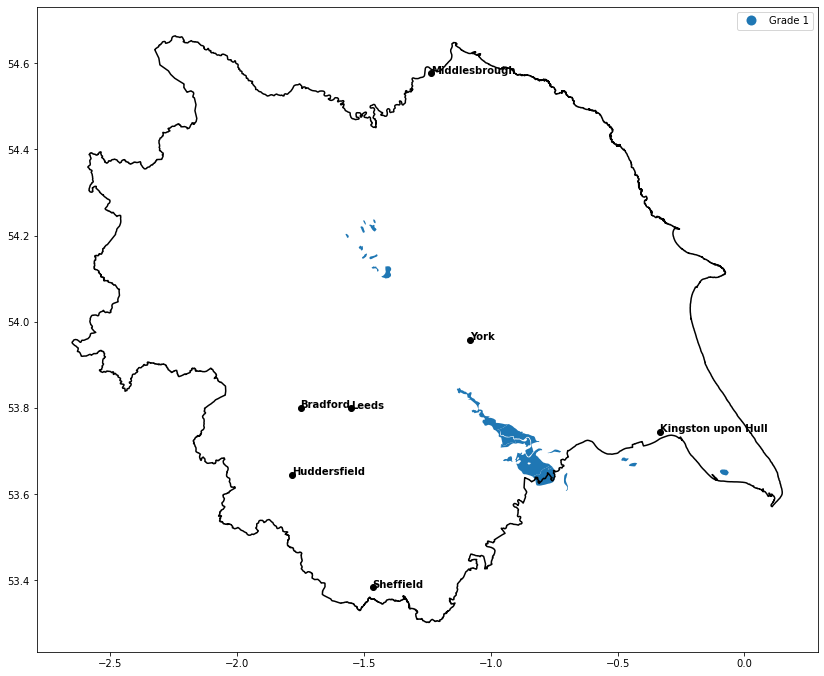

In [11]:
# Plot county boundary and crop positions on the same axes.
# For some reason this is the only way I found to plot the boundary of a single county

ax_base = counties.iloc[yorkshire_index:yorkshire_index+1].boundary.plot(color = 'k', figsize = (14,14))
alc_grade["alc1"].plot('alc_grade', ax=ax_base, legend=True, markersize = 1)

for key in city_dict.keys():
    lat, lon = city_dict[key]
    plt.text(lon, lat, key, fontweight= 'bold')
    plt.plot(lon, lat, 'ko')

# plt.xlim(-3.1,0.25);


# plt.savefig('geogext.png', dpi=200)

In [12]:
alc_grade_y = {}
alc_grade_y_gdf = []
for ig, grade in enumerate(alc_grade.items()):
    s = gpd.GeoSeries(alc_grade[f'alc{ig+1}']['geometry'].buffer(0), crs='EPSG:4326')
   
    d = {'alc_grade' : f'Grade {ig+1}' , 'geometry' : s.intersection(counties.iloc[66]['geometry'])}
    
    gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
    alc_grade_y_gdf.append(gdf)


In [13]:
alc_grade_y_gdf_final = alc_grade_y_gdf[0]
for i in range(1,len(alc_grade_y_gdf)):
    alc_grade_y_gdf_final = alc_grade_y_gdf_final.merge(alc_grade_y_gdf[i], how='outer')

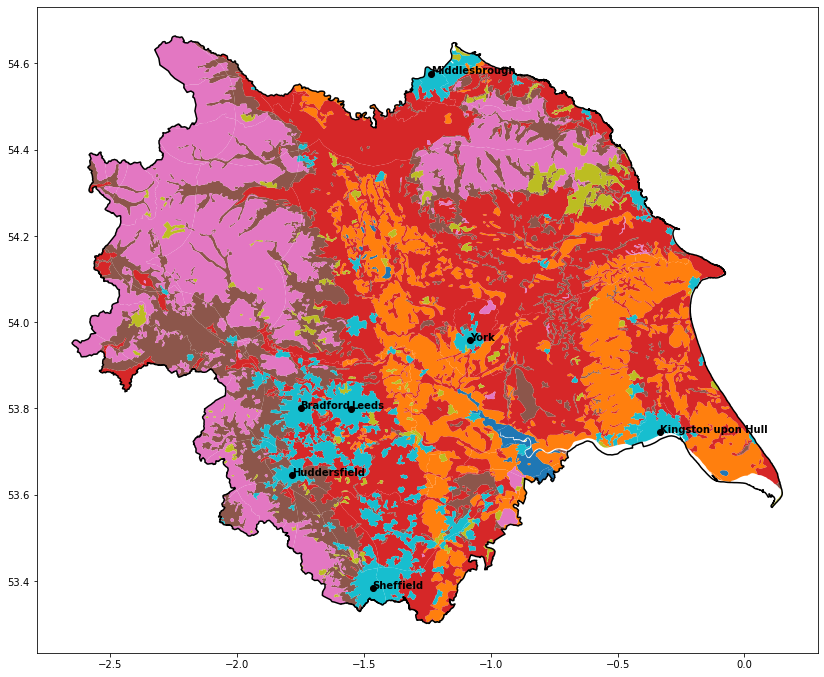

In [14]:
# Plot county boundary and crop positions on the same axes.
# For some reason this is the only way I found to plot the boundary of a single county

ax_base = counties.iloc[yorkshire_index:yorkshire_index+1].boundary.plot(color = 'k', figsize = (14,14))
alc_grade_y_gdf_final.plot('alc_grade', ax=ax_base, markersize = 1)

for key in city_dict.keys():
    lat, lon = city_dict[key]
    plt.text(lon, lat, key, fontweight= 'bold')
    plt.plot(lon, lat, 'ko')

# plt.xlim(-3.1,0.25);

# plt.savefig('geogext.png', dpi=200)

In [15]:
alc_grade_y_gdf_final['Area [ha]'] = alc_grade_y_gdf_final.to_crs(epsg=27700)['geometry'].area / 10000
alc_grade_y_gdf_final

,alc_grade,geometry,Area [ha]
0,Grade 1,"MULTIPOLYGON (((-0.07189 53.64297, -0.07355 53...",6841.248619
1,Grade 1,"POLYGON ((-0.83476 53.63990, -0.83415 53.64033...",1080.607872
2,Grade 1,"MULTIPOLYGON (((-0.93254 53.76205, -0.93304 53...",3907.470086
3,Grade 2,"MULTIPOLYGON (((-1.25164 53.30190, -1.25161 53...",14.920048
4,Grade 2,"MULTIPOLYGON (((-0.12977 53.65202, -0.08560 53...",142.192481
...,...,...,...
180,Grade 7,"MULTIPOLYGON (((-0.27259 54.18277, -0.27463 54...",7403.383868
181,Grade 7,"MULTIPOLYGON (((-0.96492 53.60377, -0.96566 53...",13140.533483
182,Grade 7,"MULTIPOLYGON (((-1.27803 53.72680, -1.27792 53...",39842.243729
183,Grade 7,"MULTIPOLYGON (((-1.11338 53.99011, -1.11051 53...",3483.010005


In [16]:
ww = crops[crops['crop_code'] == 'ww']

alc_grade3 = alc_grade_y_gdf_final[alc_grade_y_gdf_final['alc_grade'] == 'Grade 3']

ww_crops_alc3 = []

for j in range(len(alc_grade3)):
    print(j, end=' ')
    pol_grade3 = alc_grade3.iloc[j]['geometry']

    for i in range(len(ww)):
        if pol_grade3.contains(ww.iloc[i]['geometry'].centroid):
            ww_crops_alc3.append(ww.iloc[i])
            

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 

In [17]:
ww_crops_alc3_gpd = gpd.GeoDataFrame(ww_crops_alc3, crs='EPSG:4326')

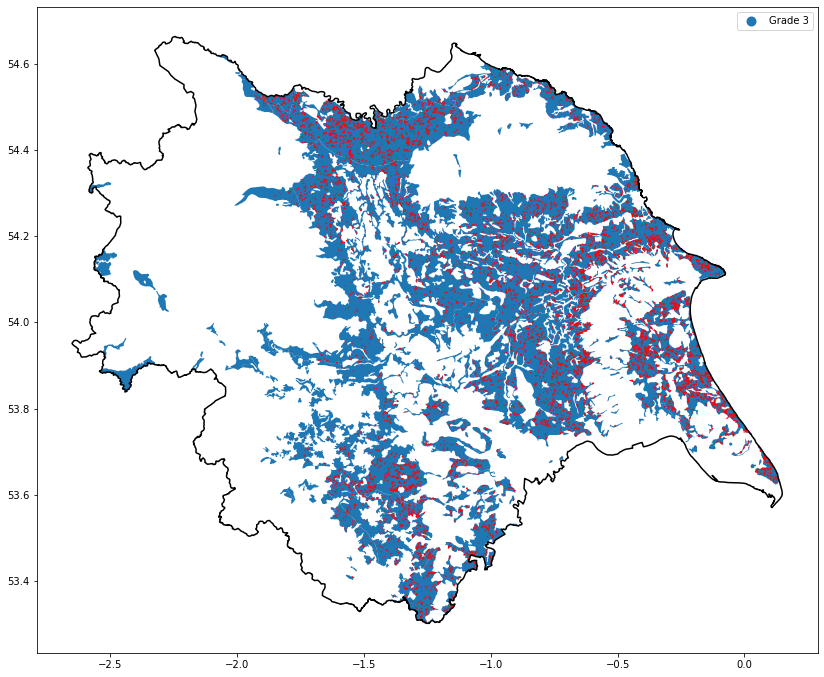

In [18]:
# Plot county boundary and crop polygons on the same axes.
# For some reason this is the only way I found to plot the boundary of a single county
ax_base = counties.iloc[yorkshire_index:yorkshire_index+1].boundary.plot(color = 'k', figsize = (14,14))
alc_grade3.plot('alc_grade', ax=ax_base, legend=True, markersize = 1)
ww_crops_alc3_gpd.plot(ax=ax_base, legend=True, markersize = 4, color = 'r')

# for key in city_dict.keys():
#     lat, lon = city_dict[key]
#     plt.text(lon, lat, key, fontweight= 'bold')
#     plt.plot(lon, lat, 'ko')

# plt.xlim(-3.1,0.25);


# plt.savefig('geogext.png', dpi=200)

In [19]:
total_area_alc_grade3 = alc_grade3['Area [ha]'].sum()
total_area_ww_grade3 = ww_crops_alc3_gpd.to_crs(epsg=27700)['geometry'].area.sum() / 10000

print(f'Fraction of Grade 3 area used for winter wheat = {total_area_ww_grade3 / total_area_alc_grade3}')

Fraction of Grade 3 area used for winter wheat = 0.1312447948606487
